In [1]:
import pandas as pd
import numpy as np
import sys, os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/MyDrive/Colab Notebooks/Automatic_Ticket_Assignment_NLP_Project"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/Automatic_Ticket_Assignment_NLP_Project
input_data.xlsx  NLP_Automatic_Ticket_Assignment_Capstone_Project.ipynb


In [3]:
project_path = 'content/drive/MyDrive/Colab Notebooks/Automatic_Ticket_Assignment_NLP_Project/'
ticket_df = pd.read_excel('input_data.xlsx')  
ticket_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
ticket_df.shape

(8500, 4)

In [5]:
ticket_df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [6]:
ticket_df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [7]:
targetClassCnt=ticket_df['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

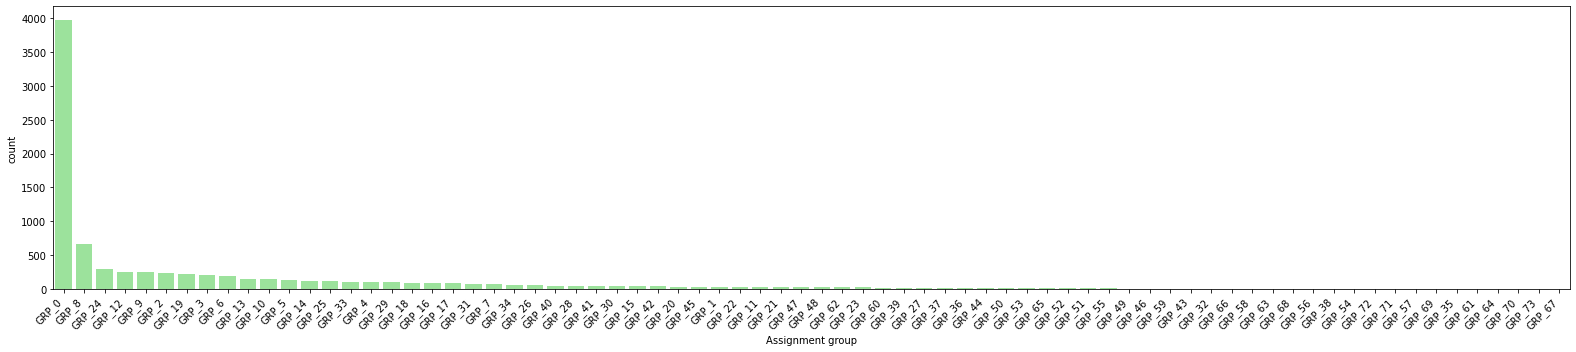

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

DescOrder = ticket_df['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))

ax = sns.countplot(x='Assignment group', data=ticket_df, order=DescOrder, color='lightgreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [21]:
ticket_df['sd_len'] = ticket_df['Short description'].astype(str).apply(len)
ticket_df['sd_word_count'] = ticket_df['Short description'].apply(lambda x: len(str(x).split()))
ticket_df['ld_len'] = ticket_df['Description'].astype(str).apply(len)
ticket_df['ld_word_count'] = ticket_df['Description'].apply(lambda x: len(str(x).split()))
ticket_df.head()

,Short description,Description,Caller,Assignment group,ShortDescLen,sd_len,sd_word_count,ld_len,ld_word_count
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,11,11,2,206,33
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,7,7,1,194,25
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,18,18,5,87,11
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,29,5,29,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,12,2,12,2


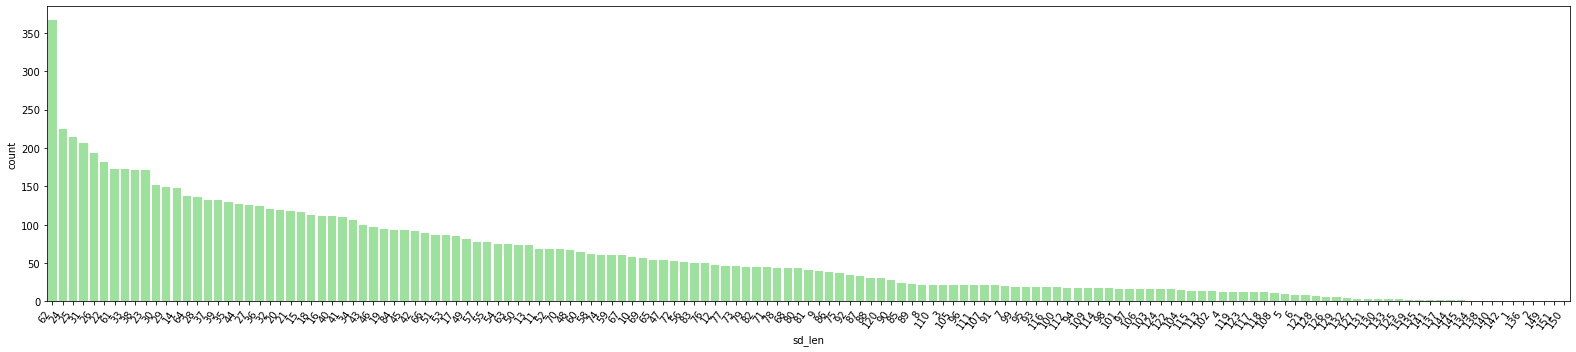

In [25]:

sdDescOrder = ticket_df['sd_len'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))

ax = sns.countplot(x='sd_len', data=ticket_df, order=sdDescOrder, color='lightgreen', )
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")
plt.tight_layout()
plt.show()


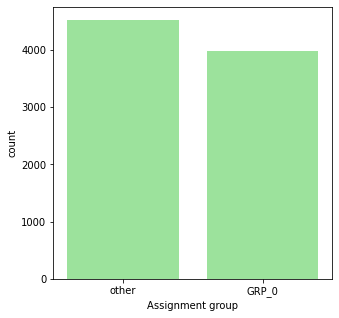

In [10]:
ticket_df_GRP0 = ticket_df.copy()

ticket_df_GRP0['Assignment group']=ticket_df_GRP0['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0' else x)

DescOrderGrp = ticket_df_GRP0['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=ticket_df_GRP0, order = DescOrderGrp, color='lightgreen')


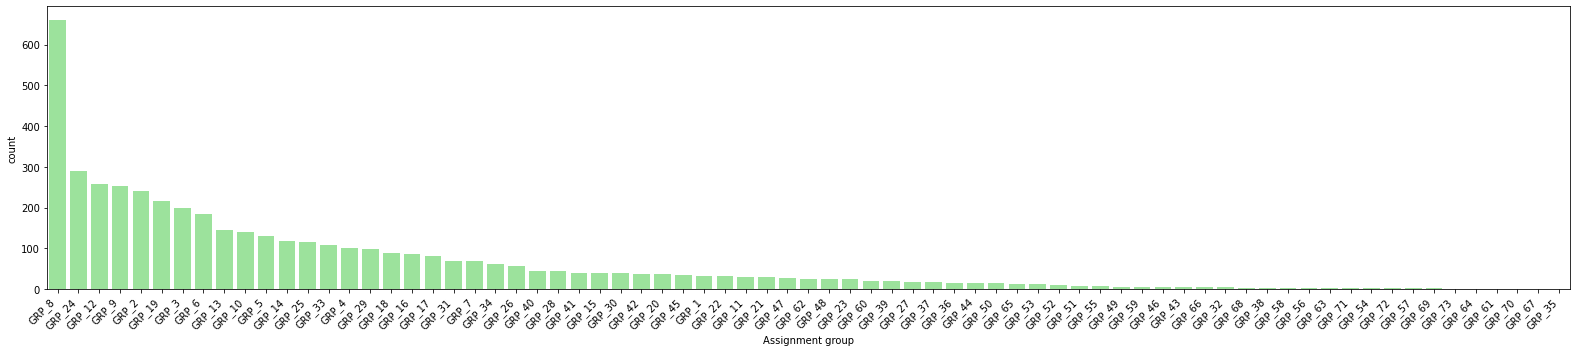

In [11]:
TicketOthersDF = ticket_df[ticket_df['Assignment group'] != 'GRP_0']

descending_order = TicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=TicketOthersDF, color='lightgreen',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
from wordcloud import WordCloud, STOPWORDS

STOP_WORDS = STOPWORDS.union({'yes','na','hi',
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

wordcloud = WordCloud(width=400, height=400, 
                      stopwords=STOP_WORDS, min_font_size=10).generate(corpus)
plt.figure(figsize=(10,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis(off)
plt.tight_layout(pad=0)
plt.show

NameError: ignored

In [28]:
maxOthers = TicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

In [13]:
# Sampling
from sklearn.utils import resample

TicketOthersDF_resample = TicketOthersDF[0:0]

for grp in TicketOthersDF['Assignment group'].unique():
  print(grp)


GRP_1
GRP_3
GRP_4
GRP_5
GRP_6
GRP_7
GRP_8
GRP_9
GRP_10
GRP_11
GRP_12
GRP_13
GRP_14
GRP_15
GRP_16
GRP_17
GRP_18
GRP_19
GRP_2
GRP_20
GRP_21
GRP_22
GRP_23
GRP_24
GRP_25
GRP_26
GRP_27
GRP_28
GRP_29
GRP_30
GRP_31
GRP_33
GRP_34
GRP_35
GRP_36
GRP_37
GRP_38
GRP_39
GRP_40
GRP_41
GRP_42
GRP_43
GRP_44
GRP_45
GRP_46
GRP_47
GRP_48
GRP_49
GRP_50
GRP_51
GRP_52
GRP_53
GRP_54
GRP_55
GRP_56
GRP_57
GRP_58
GRP_59
GRP_60
GRP_61
GRP_32
GRP_62
GRP_63
GRP_64
GRP_65
GRP_66
GRP_67
GRP_68
GRP_69
GRP_70
GRP_71
GRP_72
GRP_73
